In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def load_data(filename):
    cols = ['timestamp', 
        'px', 'py', 
        'vel', 'yaw_angle', 'yaw_rate', 
        'sensor', 
        'nis',
        'px_measured', 'py_measured', 
        'px_gt', 'py_gt',
        'vx_gt', 'vy_gt']
    return pd.read_csv(filename, sep= '\t', names = cols, skiprows=1)

df = load_data('../data/output.txt')
# only radar
df_radar = load_data('../data/output-no-laser.txt')
# only lidar
df_laser = load_data('../data/output-no-radar.txt')

In [4]:
df.head()

,timestamp,px,py,vel,yaw_angle,yaw_rate,sensor,nis,px_measured,py_measured,px_gt,py_gt,vx_gt,vy_gt
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,2.187320e-314,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.735335,0.629467,7.20389,-2.012340e-17,-1.024440e-17,radar,7.467010e+01,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.160500,0.494943,7.20697,-1.271910e-01,-1.185120e-02,lidar,2.209920e-01,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.258010,0.533087,7.19217,1.226960e-01,3.059330e-02,radar,1.824990e+00,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.615820,0.595358,7.20568,1.615190e-01,4.618860e-02,lidar,1.673690e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


In [5]:
df_laser.head()

,timestamp,px,py,vel,yaw_angle,yaw_rate,sensor,nis,px_measured,py_measured,px_gt,py_gt,vx_gt,vy_gt
0,1477010443000000,0.312243,0.580340,0.000000,0.000000e+00,0.000000,lidar,2.246420e-314,0.312243,0.580340,0.60000,0.600000,5.19994,0.000000
1,1477010443100000,1.155070,0.483257,0.083616,9.893340e-18,0.000000,lidar,7.286250e-01,1.173850,0.481073,1.11998,0.600225,5.19943,0.005390
2,1477010443200000,1.449660,0.553238,0.993060,1.538600e-02,0.002523,lidar,4.830140e+00,1.650630,0.624690,1.63990,0.601347,5.19839,0.017960
3,1477010443300000,1.903560,0.594694,2.553860,1.575780e-01,0.037400,lidar,8.860040e+00,2.188820,0.648739,2.15970,0.604086,5.19678,0.037693
4,1477010443400000,2.410770,0.636472,3.696070,1.103060e-01,0.017599,lidar,6.676500e+00,2.655260,0.665980,2.67932,0.609155,5.19450,0.064565


In [6]:
df_radar.head()

,timestamp,px,py,vel,yaw_angle,yaw_rate,sensor,nis,px_measured,py_measured,px_gt,py_gt,vx_gt,vy_gt
0,1477010443050000,0.735335,0.629467,7.20389,-2.012340e-17,-1.024440e-17,radar,74.67010,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
1,1477010443150000,0.906123,0.146404,7.29217,1.181500e-01,4.330030e-02,radar,1.23647,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
2,1477010443250000,1.492610,0.504004,6.52250,3.089840e-01,6.067260e-02,radar,4.60568,1.623310,0.499091,1.899820,0.602470,5.19766,0.026932
3,1477010443350000,1.974720,0.568276,5.82752,2.025130e-01,-1.177020e-01,radar,5.48451,1.967010,0.557117,2.419540,0.606284,5.19573,0.050239
4,1477010443450000,2.608990,0.602127,5.64492,5.726960e-02,-4.828580e-01,radar,3.30154,2.920340,0.645898,2.939040,0.612786,5.19309,0.080668


In [13]:
def display_nis(df, title=''):
    """
    Info about the Chi-squared distribution values
    https://en.wikipedia.org/wiki/Chi-squared_distribution
    """
    grouped = df.groupby('sensor')
    chi_square = {
        'lidar': 5.991,
        'radar': 7.815
    }
    for (key, item) in grouped:
        plt.plot(item.index.values, item['nis'])
        plt.plot([item.index.values[0], item.index.values[-1]], np.full(2, chi_square[key]))
        plt.title(key + " NIS" + ' ' + title)
        plt.show()

In [19]:
def visualize_position(df, title=''):
    plt.scatter(df['px_measured'], df['py_measured'], label='Measurement', s=5, color='orange')
    plt.plot(df['px_gt'], df['py_gt'], label='Ground truth position', color='red')
    plt.plot(df['px'], df['py'], label='Estimated position', color='blue', linestyle='dotted')
    plt.xlabel('px')
    plt.ylabel('py')
    plt.title('Position estimation' + ' ' + title)
    plt.legend(loc='lower right')
    plt.show()

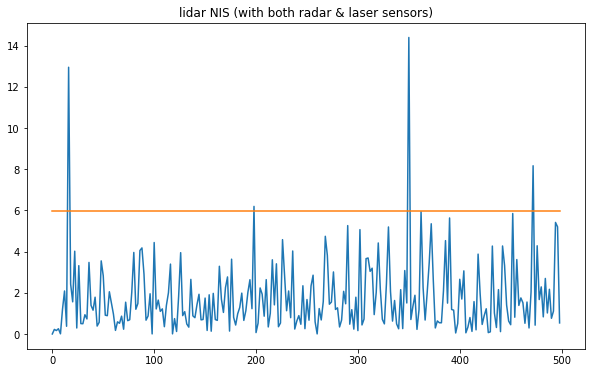

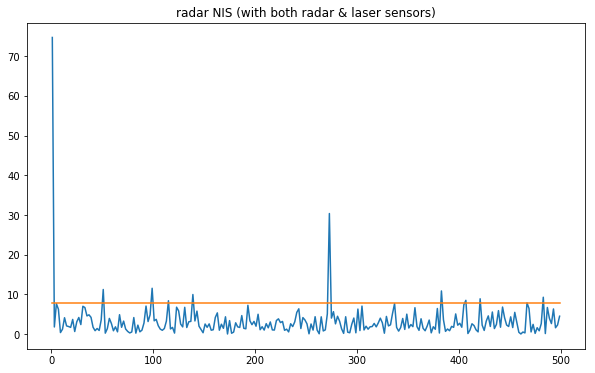

In [18]:
display_nis(df, '(with both radar & laser sensors)')

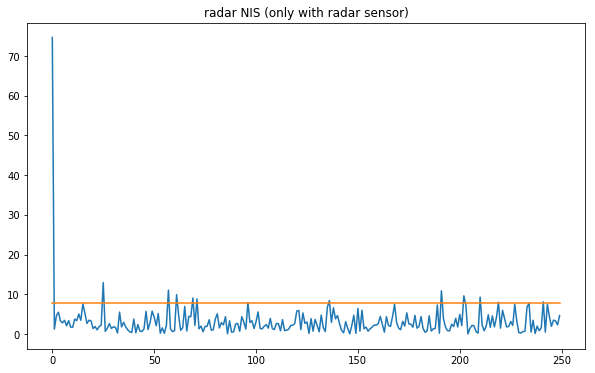

In [16]:
display_nis(df_radar, '(only with radar sensor)')

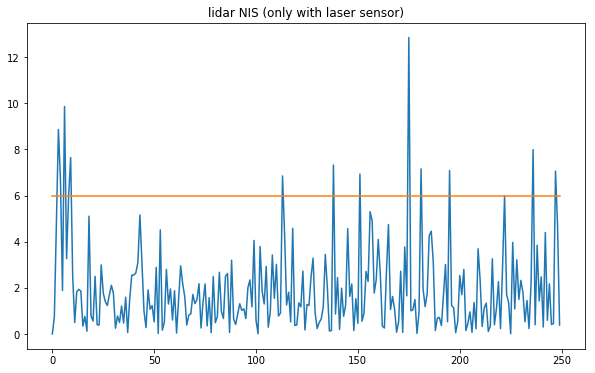

In [17]:
display_nis(df_laser, '(only with laser sensor)')

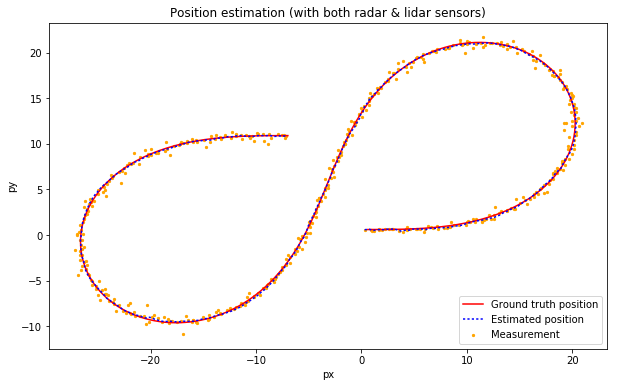

In [22]:
visualize_position(df, '(with both radar & lidar sensors)')

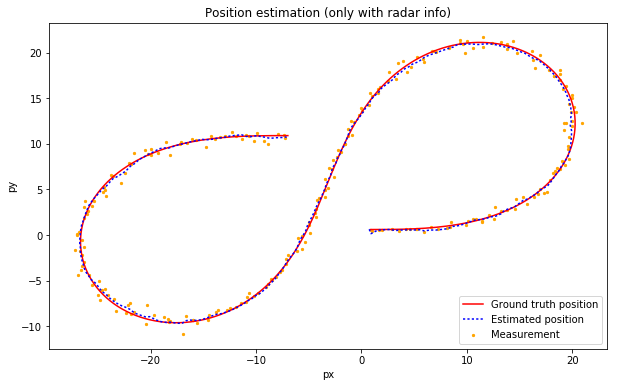

In [23]:
visualize_position(df_radar, '(only with radar info)')

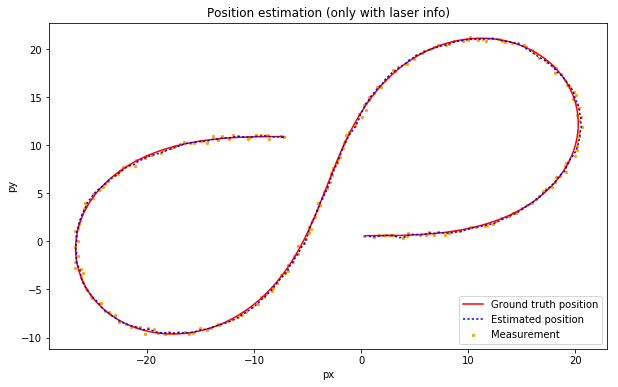

In [24]:
visualize_position(df_laser, '(only with laser info)')